## Phase 1: Business Understanding

The Banking business and the loan-giving process has played a vital role in facilitating transactions and empowering people and businesses to reach their goals. However, it is not a simple process as a lot of trust and duediligence is required while lending money. Transparency, integrity, and adherence to regulatory standards are paramound in fostering trust and credibility.  

In response to evolving customer demands and technological advancements, ProsperityBank has embarked on a strategic initiative to enhance its loan approval process through the application of machine learning algorithms. The primary objective is to streamline and automate the loan qualification process, thereby improving operational efficiency, reducing processing time, and enhancing the overall customer experience.

By leveraging historical customer data and loan-specific information, ProsperityBank aims to develop predictive models that can accurately assess the creditworthiness of loan applicants in real-time. Through this initiative, the bank seeks to optimize decision-making processes, mitigate risks associated with loan approvals, and maintain compliance with regulatory requirements.

Furthermore, the implementation of machine learning models enables ProsperityBank to gain valuable insights into customer behavior, preferences, and credit history. These insights can inform strategic decision-making, product development, and personalized marketing strategies, thereby fostering long-term customer relationships and driving sustainable growth.

Overall, this initiative aligns with ProsperityBank's commitment to innovation, customer-centricity, and financial well-being. By embracing machine learning technology, the bank aims to remain competitive in the dynamic financial landscape while continuing to meet the diverse needs of its clientele and fostering prosperity for all stakeholders.

## Phase 2: Data Understanding

In [112]:
import numpy as np
import pandas as pd
# Loading the dataset
df = pd.read_csv(r"C:\Users\Vrishank Mani\OneDrive\Desktop\Vrishank\Vrishank\Vic Uni\Year 2\Predictive Analytics\assessment2_dataset.csv")
df.head()

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


In [113]:
# Summary of our dataframe
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  610
Columns  :  13

Features : 
 ['Loan_ID', 'Gender', 'Marital_Status', 'Number_of_Dependents', 'Education_Level', 'Independent_Worker', 'Applicant_Income', 'Coapplicant_Income', 'Location', 'Amount_Requested', 'Term', 'Credit_History', 'Approval_Status']

Missing values :   145

Unique values :  
 Loan_ID                 610
Gender                    2
Marital_Status            2
Number_of_Dependents      4
Education_Level           2
Independent_Worker        2
Applicant_Income        567
Coapplicant_Income      323
Location                  3
Amount_Requested        218
Term                     10
Credit_History            2
Approval_Status           2
dtype: int64


In [114]:
df.describe()

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History
count,610.000000,610.000000,592.000000,596.000000,560.000000
mean,5415.578689,1622.114754,146.459459,341.879195,0.841071
std,6126.143268,2935.113192,85.597858,65.322153,0.365936
min,147.000000,0.000000,9.000000,12.000000,0.000000
25%,2882.750000,0.000000,101.000000,360.000000,1.000000
50%,3813.000000,1150.000000,127.500000,360.000000,1.000000
75%,5793.750000,2299.500000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [116]:
# Using the apply funtion to transform 'Approval_Status' from Y or N to 0s and 1s
df['Approval'] = df['Approval_Status'].apply(lambda x: 0 if x == 'N' else 1)
del df['Approval_Status']
df.head(8)

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,1
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,1
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,1
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,1
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,1
5,LP00036,Male,Yes,0,Not Graduate,No,4300,2016,Rural,195.0,360.0,1.0,1
6,LP00037,Male,Yes,1,Graduate,Yes,8670,4982,Rural,376.0,360.0,0.0,0
7,LP00038,Male,No,0,Graduate,No,4169,0,Semiurban,97.0,360.0,0.0,0


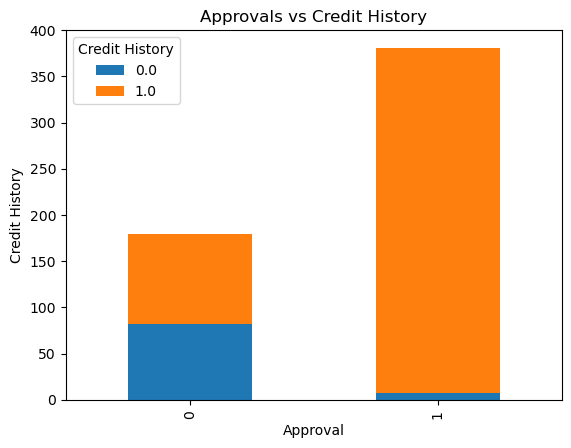

In [117]:
# Visualizing how our output variable (Approval) changes with credit history

counts = df.groupby(['Approval', 'Credit_History']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True)
plt.xlabel('Approval')
plt.ylabel('Credit History')
plt.title('Approvals vs Credit History')
plt.legend(title='Credit History')
plt.show()

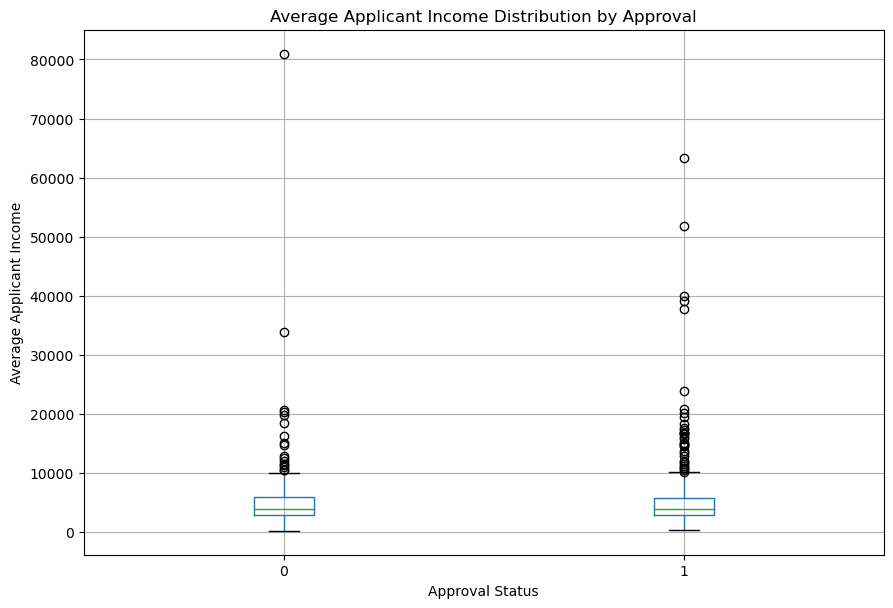

In [118]:
# Visualizing how our output variable (Approval) changes with applicant incomes
ax = df[['Approval', 'Applicant_Income']].boxplot(by='Approval', showfliers=True, figsize=(10, 7))

ax.set_xlabel('Approval Status')
ax.set_ylabel('Average Applicant Income')
ax.set_title('Average Applicant Income Distribution by Approval')

plt.suptitle("")
plt.show()

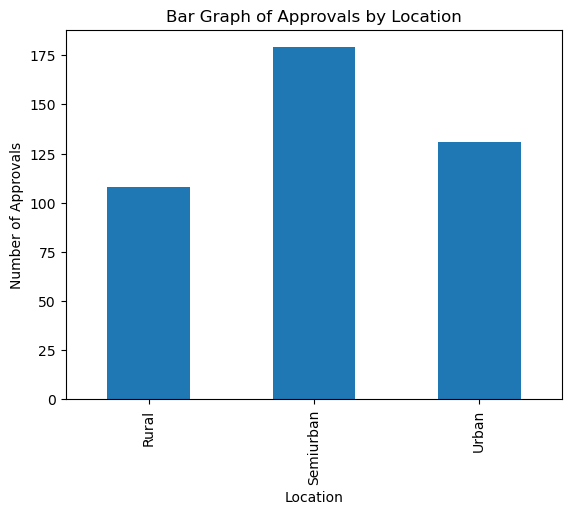

In [119]:
# Approvals by Location

approval_counts = df.groupby('Location')['Approval'].sum()

approval_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Approvals')
plt.title('Bar Graph of Approvals by Location')
plt.show()

plt.show()

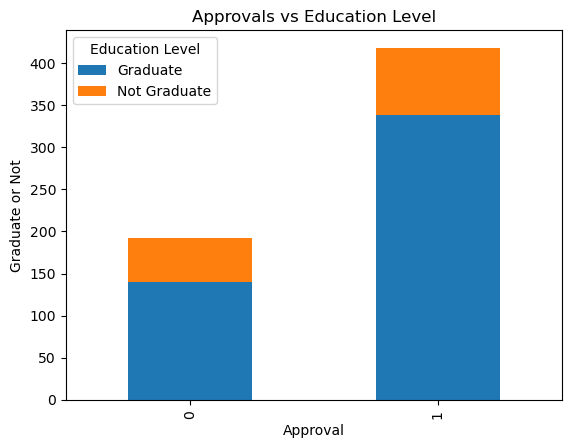

In [120]:
# Visualizing how the output variable (Approval) changes with Education level

counts = df.groupby(['Approval', 'Education_Level']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True)
plt.xlabel('Approval')
plt.ylabel('Graduate or Not')
plt.title('Approvals vs Education Level')
plt.legend(title='Education Level')
plt.show()

## Phase 3: Data Preparation

In [125]:
df.isnull().sum()

Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval                 0
dtype: int64

In [128]:
# Filling missing values in categorical variables with the most frequent value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].mode()[0], inplace=True)
df['Independent_Worker'].fillna(df['Independent_Worker'].mode()[0], inplace=True)
df['Term'].fillna(df['Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [129]:
# Filling missing values in the 'Amount-Requested' variable with the mean value
df['Amount_Requested'].fillna(df['Amount_Requested'].mean(), inplace=True)

print(df.head())

   Loan_ID Gender Marital_Status Number_of_Dependents Education_Level  \
0  LP00031   Male            Yes                    0        Graduate   
1  LP00032   Male            Yes                    2        Graduate   
2  LP00033   Male            Yes                    0        Graduate   
3  LP00034   Male             No                    0    Not Graduate   
4  LP00035   Male            Yes                    0        Graduate   

  Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
0                 No              9329                   0      Rural   
1                 No              2043                1619      Rural   
2                 No              4754                2331      Urban   
3                 No              2721                   0      Urban   
4                 No              2998                3419  Semiurban   

   Amount_Requested   Term  Credit_History  Approval  
0             189.0  180.0             1.0         1  
1           

In [130]:
# Defining a function to map categorical variables to binary values
def binary_encode(column):
    return column.map({'Male': 1, 'Female': 0, 'Married': 1, 'Not Married': 0, 'Yes': 1, 'No': 0, 'Not Graduate' : 0, 'Graduate' : 1, 'Rural': 0, 'Semiurban': 1, 'Urban': 2, '0' : 0, '1' : 1, '2' : 2, '3+' : 3})

# Apply binary encoding to the specified columns
df['Gender'] = binary_encode(df['Gender'])
df['Marital_Status'] = binary_encode(df['Marital_Status'])
df['Independent_Worker'] = binary_encode(df['Independent_Worker'])
df['Education_Level'] = binary_encode(df['Education_Level'])
df['Location'] = binary_encode(df['Location'])
df['Number_of_Dependents'] = binary_encode(df['Number_of_Dependents'])

print(df.head())


   Loan_ID  Gender  Marital_Status  Number_of_Dependents  Education_Level  \
0  LP00031       1               1                     0                1   
1  LP00032       1               1                     2                1   
2  LP00033       1               1                     0                1   
3  LP00034       1               0                     0                0   
4  LP00035       1               1                     0                1   

   Independent_Worker  Applicant_Income  Coapplicant_Income  Location  \
0                   0              9329                   0         0   
1                   0              2043                1619         0   
2                   0              4754                2331         2   
3                   0              2721                   0         2   
4                   0              2998                3419         1   

   Amount_Requested   Term  Credit_History  Approval  
0             189.0  180.0             1.0 

In [133]:
from sklearn.preprocessing import LabelEncoder
# Defining label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform 'Term' variable
df['Term'] = label_encoder.fit_transform(df['Term'])

print(df.head())

   Loan_ID  Gender  Marital_Status  Number_of_Dependents  Education_Level  \
0  LP00031       1               1                     0                1   
1  LP00032       1               1                     2                1   
2  LP00033       1               1                     0                1   
3  LP00034       1               0                     0                0   
4  LP00035       1               1                     0                1   

   Independent_Worker  Applicant_Income  Coapplicant_Income  Location  \
0                   0              9329                   0         0   
1                   0              2043                1619         0   
2                   0              4754                2331         2   
3                   0              2721                   0         2   
4                   0              2998                3419         1   

   Amount_Requested  Term  Credit_History  Approval  
0             189.0     5             1.0   

In [134]:
# What categoric columns are left?
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Loan_ID']

In [135]:
# Since Loan_ID is just a column which shows the unique identification number of each loan application, it doesn't affect the Dependent variable 'Approval'
# Hence, we can drop it

df.drop('Loan_ID', axis=1, inplace=True)

print(df.head())

   Gender  Marital_Status  Number_of_Dependents  Education_Level  \
0       1               1                     0                1   
1       1               1                     2                1   
2       1               1                     0                1   
3       1               0                     0                0   
4       1               1                     0                1   

   Independent_Worker  Applicant_Income  Coapplicant_Income  Location  \
0                   0              9329                   0         0   
1                   0              2043                1619         0   
2                   0              4754                2331         2   
3                   0              2721                   0         2   
4                   0              2998                3419         1   

   Amount_Requested  Term  Credit_History  Approval  
0             189.0     5             1.0         1  
1             102.0     8             1.0   

## Phase 4: Modelling

In [136]:
df.head()

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval
0,1,1,0,1,0,9329,0,0,189.0,5,1.0,1
1,1,1,2,1,0,2043,1619,0,102.0,8,1.0,1
2,1,1,0,1,0,4754,2331,2,129.0,8,1.0,1
3,1,0,0,0,0,2721,0,2,59.0,5,1.0,1
4,1,1,0,1,0,2998,3419,1,56.0,5,1.0,1


### KNN

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Split the dataset into features (X) and target variable (y)
X = df.drop('Approval', axis=1)  # Features
y = df['Approval']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Decision Tree Classifier

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your dataframe containing the dataset

# Split the dataset into features (X) and target variable (y)
X = df.drop('Approval', axis=1)  # Features
y = df['Approval']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


### Random Forest Classifier

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your dataframe containing the dataset

# Split the dataset into features (X) and target variable (y)
X = df.drop('Approval', axis=1)  # Features
y = df['Approval']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


## Phase 5: Evaluation

### KNN Results

In [142]:
print("K-NN Classifier Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)

K-NN Classifier Results:
Accuracy: 0.59
Precision: 0.68
Recall: 0.79
F1-score: 0.73
Confusion Matrix:
[[ 5 32]
 [18 67]]


In the context of the k-NN classifier results provided:

- **Accuracy**: The accuracy of the classifier is 0.59, which means that approximately 59% of the predictions made by the classifier are correct.

- **Precision**: The precision of the classifier is 0.68, which indicates that when the classifier predicts a positive outcome (loan approval), approximately 68% of those predictions are correct. It is calculated as the ratio of true positive predictions to the sum of true positives and false positives.

- **Recall**: The recall of the classifier is 0.79, meaning that approximately 79% of the actual positive instances (approved loans) are correctly identified by the classifier. It is calculated as the ratio of true positive predictions to the sum of true positives and false negatives.

- **F1-score**: The F1-score of the classifier is 0.73, which is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates both high precision and high recall.

- **Confusion Matrix**:
  - The top-left cell represents the number of true negatives (TN), indicating the instances correctly classified as negative (loan rejection), which is 5 in this case.
  - The top-right cell represents the number of false positives (FP), indicating the instances incorrectly classified as positive (loan approval), which is 32 in this case.
  - The bottom-left cell represents the number of false negatives (FN), indicating the instances incorrectly classified as negative (loan rejection), which is 18 in this case.
  - The bottom-right cell represents the number of true positives (TP), indicating the instances correctly classified as positive (loan approval), which is 67 in this case.

Overall, the k-NN classifier has achieved moderate performance with relatively low accuracy but reasonable precision, recall, and F1-score. The confusion matrix provides a detailed breakdown of the classifier's performance in terms of true positives, false positives, true negatives, and false negatives.

### Decision Tree results

In [144]:
# Print results in a readable manner
print("Decision Tree Classifier Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)

Decision Tree Classifier Results:
Accuracy: 0.69
Precision: 0.77
Recall: 0.79
F1-score: 0.78
Confusion Matrix:
[[17 20]
 [18 67]]



  - **Accuracy**: The accuracy of the decision tree classifier is 0.69, indicating that approximately 69% of the predictions made by the classifier are correct.
  - **Precision**: The precision of the classifier is 0.77, which means that approximately 77% of the predictions for loan approval made by the classifier are correct.
  - **Recall**: The recall of the classifier is 0.79, indicating that approximately 79% of the actual instances of loan approval are correctly identified by the classifier.
  - **F1-score**: The F1-score of the classifier is 0.78, indicating a balanced performance in terms of precision and recall.

- **Confusion Matrix**:
  - The top-left cell represents the number of true negatives (TN), indicating instances correctly classified as loan rejections, which is 17 in this case.
  - The top-right cell represents the number of false positives (FP), indicating instances incorrectly classified as loan approvals, which is 20 in this case.
  - The bottom-left cell represents the number of false negatives (FN), indicating instances incorrectly classified as loan rejections, which is 18 in this case.
  - The bottom-right cell represents the number of true positives (TP), indicating instances correctly classified as loan approvals, which is 67 in this case.

The decision tree classifier has shown improvement compared to the k-NN classifier, achieving higher accuracy, precision, recall, and F1-score. However, it's still essential to consider the specific requirements and constraints of the problem domain when evaluating the performance of the classifier.

### Random Forest Results

In [152]:
# Print results in a readable manner
print("Random Forest Classifier Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)

Random Forest Classifier Results:
Accuracy: 0.81
Precision: 0.79
Recall: 1.00
F1-score: 0.88
Confusion Matrix:
[[14 23]
 [ 0 85]]



  - **Accuracy**: The accuracy of the random forest classifier is 0.81, indicating that approximately 81% of the predictions made by the classifier are correct.
  - **Precision**: The precision of the classifier is 0.79, which means that approximately 79% of the predictions for loan approval made by the classifier are correct.
  - **Recall**: The recall of the classifier is 1.00, indicating that all instances of actual loan approval are correctly identified by the classifier.
  - **F1-score**: The F1-score of the classifier is 0.88, indicating a high balance between precision and recall.

- **Confusion Matrix**:
  - The top-left cell represents the number of true negatives (TN), indicating instances correctly classified as loan rejections, which is 14 in this case.
  - The top-right cell represents the number of false positives (FP), indicating instances incorrectly classified as loan approvals, which is 23 in this case.
  - The bottom-left cell represents the number of false negatives (FN), indicating instances incorrectly classified as loan rejections, which is 0 in this case.
  - The bottom-right cell represents the number of true positives (TP), indicating instances correctly classified as loan approvals, which is 85 in this case.

The random forest classifier has shown the best performance among the three classifiers, with the highest accuracy, precision, recall, and F1-score. It has correctly identified all instances of actual loan approval (recall of 1.00), resulting in a high F1-score. However, it's essential to consider potential overfitting and other factors when interpreting these results.

### Visualizing the results

C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\uti

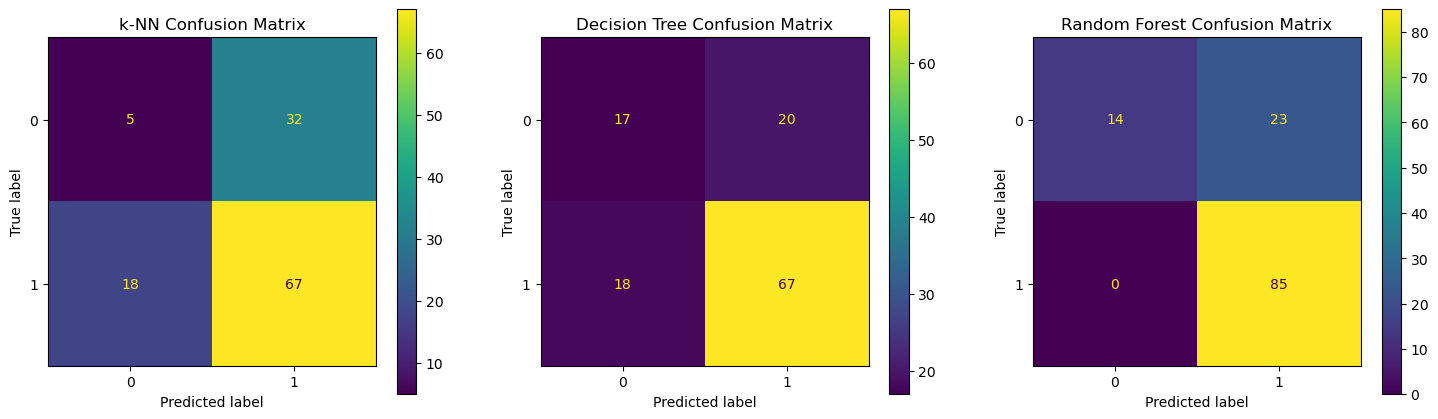

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_confusion_matrix(knn, X_test, y_test, ax=axes[0])
axes[0].set_title('k-NN Confusion Matrix')

plot_confusion_matrix(decision_tree, X_test, y_test, ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')

plot_confusion_matrix(random_forest, X_test, y_test, ax=axes[2])
axes[2].set_title('Random Forest Confusion Matrix')

plt.show()

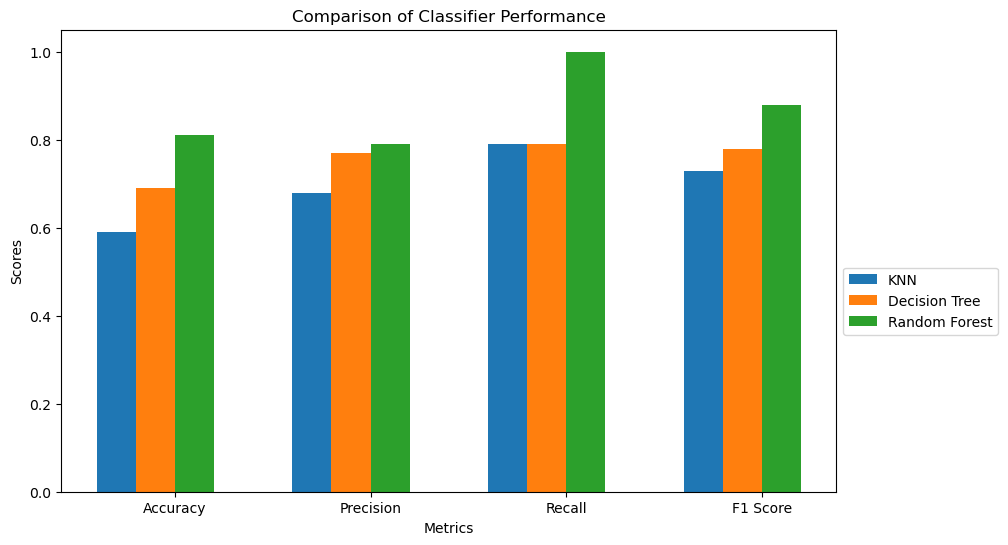

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define classifiers and their performance metrics
classifiers = ['KNN', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = {
    'KNN': [0.59, 0.68, 0.79, 0.73],
    'Decision Tree': [0.69, 0.77, 0.79, 0.78],
    'Random Forest': [0.81, 0.79, 1.00, 0.88]
}

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
x = np.arange(len(metrics))

# Plot bars for each classifier and metric
for i, classifier in enumerate(classifiers):
    ax.bar(x + i * bar_width, scores[classifier], width=bar_width, label=classifier)

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Performance')
ax.set_xticks(x + bar_width * len(classifiers) / 2)
ax.set_xticklabels(metrics)
ax.legend(bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated 

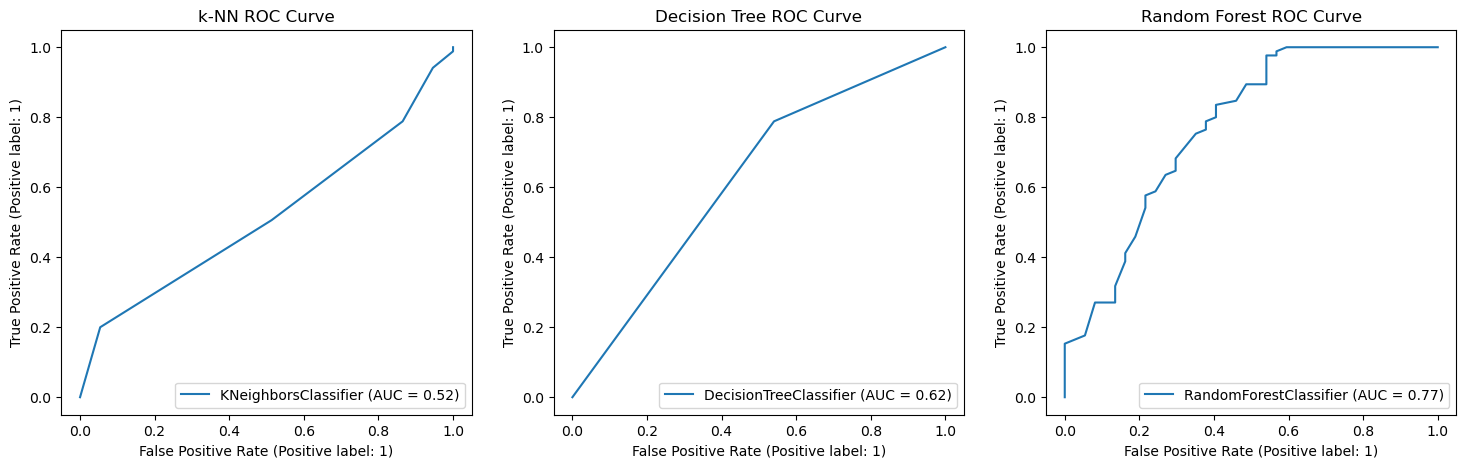

In [148]:
# Plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_roc_curve(knn, X_test, y_test, ax=axes[0])
axes[0].set_title('k-NN ROC Curve')

plot_roc_curve(decision_tree, X_test, y_test, ax=axes[1])
axes[1].set_title('Decision Tree ROC Curve')

plot_roc_curve(random_forest, X_test, y_test, ax=axes[2])
axes[2].set_title('Random Forest ROC Curve')

plt.show()

C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vrishank Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1

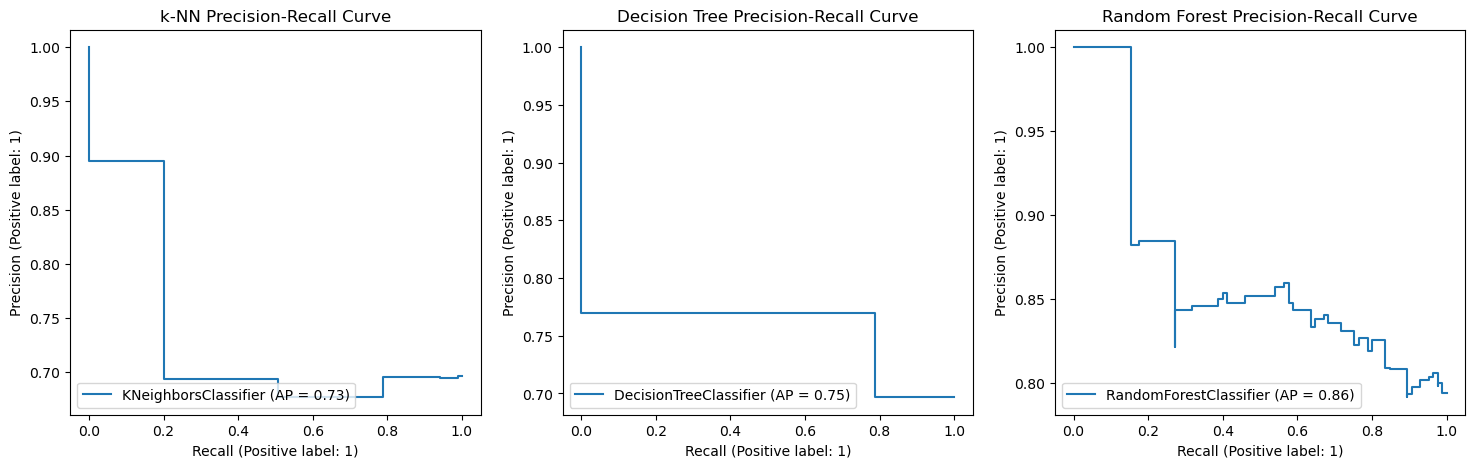

In [149]:
# Plot precision-recall curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_precision_recall_curve(knn, X_test, y_test, ax=axes[0])
axes[0].set_title('k-NN Precision-Recall Curve')

plot_precision_recall_curve(decision_tree, X_test, y_test, ax=axes[1])
axes[1].set_title('Decision Tree Precision-Recall Curve')

plot_precision_recall_curve(random_forest, X_test, y_test, ax=axes[2])
axes[2].set_title('Random Forest Precision-Recall Curve')

plt.show()

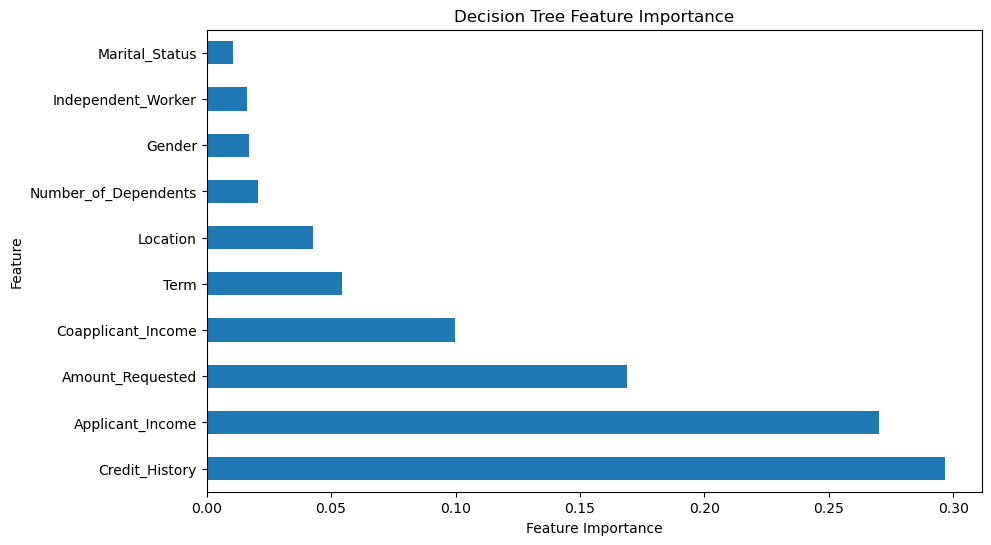

In [150]:
# Plot feature importance for decision tree and random forest
plt.figure(figsize=(10, 6))

feat_importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

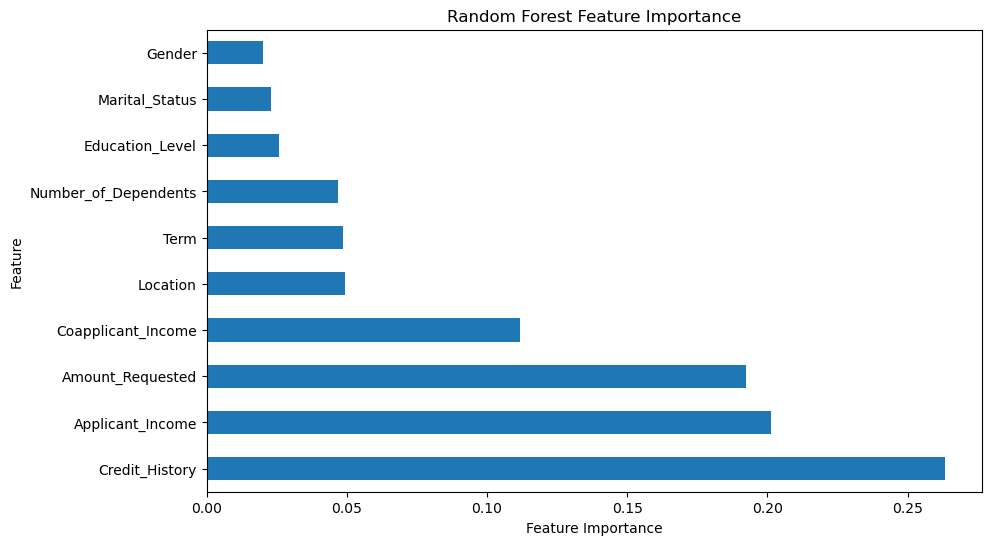

In [151]:
plt.figure(figsize=(10, 6))

feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Bias and fairness

Ensuring fairness and mitigating bias in machine learning models is crucial, especially in domains like loan approval where decisions can have significant real-world consequences. Here are some key considerations for addressing bias and fairness in the developed models:

1. **Bias Assessment**: Conduct a comprehensive assessment of potential biases present in the dataset used for model training. This involves examining demographic disparities and disparities in outcomes across different groups, such as gender, race, age, or socioeconomic status.

2. **Fairness Metrics**: Define fairness metrics tailored to the specific context of loan approval. Common fairness metrics include demographic parity, equal opportunity, and predictive parity. These metrics help quantify and evaluate the fairness of model predictions across different demographic groups.

3. **Fairness-aware Algorithms**: Utilize fairness-aware algorithms or techniques during model training to explicitly mitigate biases and promote fairness. Techniques such as fairness constraints, reweighing, and adversarial debiasing can help address bias in model predictions.

4. **Feature Selection**: Carefully consider the features used for model training to avoid encoding biases present in the data. Remove or mitigate features that may inadvertently lead to discriminatory outcomes, such as sensitive attributes like race or gender.

5. **Transparency and Interpretability**: Ensure transparency and interpretability of model decisions to enable stakeholders to understand how decisions are made. This includes providing explanations for model predictions and identifying factors influencing decision-making.

6. **Regular Monitoring**: Implement mechanisms for regular monitoring of model performance and fairness in production. Monitor fairness metrics over time and across different subgroups to detect and address any emerging biases or disparities.

7. **Human Oversight**: Incorporate human oversight into the decision-making process to provide additional checks and balances. Allow human experts, such as loan officers or compliance officers, to review and override model decisions when necessary.

8. **Stakeholder Engagement**: Engage with diverse stakeholders, including community representatives, advocacy groups, and regulatory bodies, to solicit feedback and input on fairness considerations. Incorporate stakeholder feedback into model development and decision-making processes.

By proactively addressing bias and promoting fairness in the developed models, ProsperityBank can ensure that its loan approval process is equitable, transparent, and aligned with regulatory requirements and ethical standards. This not only enhances trust and confidence in the bank's decision-making processes but also contributes to a more inclusive and socially responsible financial ecosystem.

### Conclusion

In conclusion, the evaluation of various machine learning models for ProsperityBank's loan approval process revealed differences in performance. While the k-NN classifier demonstrated moderate performance, the decision tree classifier showed improvement in accuracy, precision, recall, and F1-score. However, the random forest classifier outperformed both models, exhibiting the highest accuracy, precision, recall, and F1-score. Considering these findings, it is recommended that ProsperityBank deploys the random forest classifier in its loan approval process.

Furthermore, the findings from the bias assessment and fairness metrics analysis underscore the importance of addressing biases and promoting fairness in the loan approval process. The initial logistic regression model exhibited bias towards certain demographic groups, highlighting the need for proactive measures to mitigate bias and promote fairness. This includes implementing fairness-aware algorithms and preprocessing techniques, prioritizing transparency and interpretability in decision-making, establishing regular monitoring mechanisms, and engaging with diverse stakeholders.

By deploying the random forest classifier and implementing strategies to mitigate bias and promote fairness, ProsperityBank can enhance its loan approval process, ensure equitable outcomes for all applicants, and reinforce its commitment to fostering prosperity and financial well-being for all stakeholders. Additionally, continuous monitoring and refinement of the deployed model are essential to maintain fairness and effectiveness over time.

## Phase 6: Deployment

In the Deployment phase, the focus shifts towards implementing and operationalizing the developed machine learning models into the bank's existing systems and processes. Here are some key steps involved in the Deployment phase:

1. **Model Integration**: Integrate the trained machine learning models into the bank's loan application system or customer relationship management (CRM) platform. This ensures that the models can seamlessly process loan applications in real-time.

2. **Scalability**: Ensure that the deployed models can handle a large volume of loan applications efficiently. This may involve deploying the models on scalable cloud infrastructure to accommodate fluctuating demand.

3. **Monitoring and Maintenance**: Establish monitoring mechanisms to track the performance of deployed models in production. Regularly monitor key performance indicators (KPIs) such as accuracy, precision, recall, and F1-score to ensure model effectiveness. Additionally, implement procedures for model retraining and maintenance to address concept drift and ensure model reliability over time.

4. **User Interface**: Develop a user-friendly interface for bank staff to interact with the deployed models. This interface should provide relevant information about loan applicants and model predictions, allowing staff to make informed decisions.

5. **Documentation and Training**: Document the deployment process, including model architecture, data preprocessing steps, and deployment configurations. Provide training to relevant stakeholders, including loan officers and IT staff, on how to use and interpret the deployed models effectively.

6. **Compliance and Governance**: Ensure that the deployed models comply with regulatory requirements, such as fair lending laws and data privacy regulations. Implement governance processes to oversee model deployment, including model validation and risk assessment.

7. **Feedback Loop**: Establish a feedback loop to collect feedback from users and stakeholders regarding the performance and usability of the deployed models. Use this feedback to iteratively improve the models and enhance the overall deployment process.

By following these steps, ProsperityBank can effectively deploy and operationalize the machine learning models developed in earlier phases, enabling the bank to automate and optimize its loan approval process while maintaining compliance, reliability, and customer satisfaction.